**Data Wrangling II:**
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using mean and mode).Apply for single column and whole dataset.
2. Scan all numeric variables for outliers. If there are outliers,any of the suitabletechniques to deal with them.(using z score)
3. Display and Remove the outliers
4. Apply data transformations on at least one of the variables Create bins and Labels.
5. Draw box plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('/content/AcademicPerformance_New.csv')
data

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [40]:
# 1 - Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using mean and mode).Apply for single column and whole dataset.
missing_value = data.isnull().sum()

In [41]:
single_column = 'Average'
data[single_column].fillna(data[single_column].mean(), inplace=True)
print(data.head())

   Roll No NationalITy    WT  DSBDA    AI    Average Grade   PG
0      1.0       India  72.0   72.0  74.0  72.666667     C  Yes
1      2.0       Japan  69.0   90.0   NaN  53.000000     B   No
2      NaN         NaN   NaN    NaN   NaN  58.663265   NaN  NaN
3      4.0       China  47.0    NaN  44.0  30.333333     D  Yes
4      5.0       India  76.0   78.0   NaN  51.333333     C   No


In [42]:
numeric_columns = data.select_dtypes(include='number')
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
print(data)

      Roll No NationalITy         WT      DSBDA         AI    Average Grade  \
0    1.000000       India  72.000000  72.000000  74.000000  72.666667     C   
1    2.000000       Japan  69.000000  90.000000  62.235955  53.000000     B   
2   50.479592         NaN  61.164835  64.652632  62.235955  58.663265   NaN   
3    4.000000       China  47.000000  64.652632  44.000000  30.333333     D   
4    5.000000       India  76.000000  78.000000  62.235955  51.333333     C   
..        ...         ...        ...        ...        ...        ...   ...   
94  95.000000         USA  79.000000  64.652632  62.235955  26.333333     A   
95  96.000000       Japan  78.000000  81.000000  82.000000  80.333333     A   
96  97.000000         USA  65.000000  66.000000  62.000000  64.333333     B   
97  98.000000      Rassia  63.000000  72.000000  70.000000  68.333333     B   
98  99.000000       India  58.000000  67.000000  62.235955  41.666667     B   

     PG  
0   Yes  
1    No  
2   NaN  
3   Yes  
4

In [43]:
# 2 - Scan all numeric variables for outliers. If there are outliers,any of the suitabletechniques to deal with them.(using z score)
from scipy.stats import zscore
numeric_columns = data.select_dtypes(include='number')
z_scores = zscore(numeric_columns)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

In [44]:
# 3 - Display and Remove the outliers
print("Outliers:") # Display
print(data[outliers.any(axis=1)])

Outliers:
    Roll No NationalITy    WT  DSBDA    AI  Average Grade   PG
17     18.0      Rassia  18.0   32.0  28.0     26.0     D  Yes


In [45]:
data = data[~outliers.any(axis=1)]
print("\nDataFrame after removing outliers:")
print(data)


DataFrame after removing outliers:
      Roll No NationalITy         WT      DSBDA         AI    Average Grade  \
0    1.000000       India  72.000000  72.000000  74.000000  72.666667     C   
1    2.000000       Japan  69.000000  90.000000  62.235955  53.000000     B   
2   50.479592         NaN  61.164835  64.652632  62.235955  58.663265   NaN   
3    4.000000       China  47.000000  64.652632  44.000000  30.333333     D   
4    5.000000       India  76.000000  78.000000  62.235955  51.333333     C   
..        ...         ...        ...        ...        ...        ...   ...   
94  95.000000         USA  79.000000  64.652632  62.235955  26.333333     A   
95  96.000000       Japan  78.000000  81.000000  82.000000  80.333333     A   
96  97.000000         USA  65.000000  66.000000  62.000000  64.333333     B   
97  98.000000      Rassia  63.000000  72.000000  70.000000  68.333333     B   
98  99.000000       India  58.000000  67.000000  62.235955  41.666667     B   

     PG  
0   Y

In [47]:
# 4 - Apply data transformations on at least one of the variables Create bins and Labels.
variable = 'Average'
data['transformed_variable'] = data[variable].apply(lambda x: np.log(x + 1))
bins = [0, 25, 50, 75, 100]  # Define bin edges
labels = ['Low', 'Medium', 'High', 'Very High']  # Define labels for bins
data['bin_variable'] = pd.cut(data[variable], bins=bins, labels=labels)
print(data.head())

     Roll No NationalITy         WT      DSBDA         AI    Average Grade  \
0   1.000000       India  72.000000  72.000000  74.000000  72.666667     C   
1   2.000000       Japan  69.000000  90.000000  62.235955  53.000000     B   
2  50.479592         NaN  61.164835  64.652632  62.235955  58.663265   NaN   
3   4.000000       China  47.000000  64.652632  44.000000  30.333333     D   
4   5.000000       India  76.000000  78.000000  62.235955  51.333333     C   

    PG  transformed_variable bin_variable  
0  Yes              4.299550         High  
1   No              3.988984         High  
2  NaN              4.088717         High  
3  Yes              3.444682       Medium  
4   No              3.957634         High  


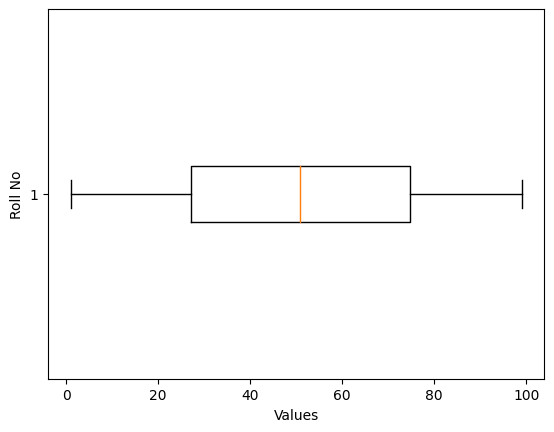

In [48]:
# 5 - Draw box plot
plt.boxplot(data)
plt.show()